In [0]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         359G   17G  324G   5% /
tmpfs           6.4G     0  6.4G   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
/dev/sda1       365G   21G  345G   6% /opt/bin
tmpfs           6.4G  8.0K  6.4G   1% /var/colab
shm             6.0G     0  6.0G   0% /dev/shm
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [0]:
!pip install keras_sequential_ascii
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import print_summary, to_categorical
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import datetime

from keras.models import Sequential
model = Sequential()
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras_sequential_ascii import sequential_model_to_ascii_printout

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_classes=10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.0
x_test /= 255.0

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(80))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


print (x_train.shape[1:])#the dimensionalities of the inputs
print(model.summary())

(32, 32, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0        

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 8s 161us/step - loss: 0.5611 - acc: 0.8006 - val_loss: 0.5705 - val_acc: 0.8035
Epoch 2/200
50000/50000 [==============================] - 8s 152us/step - loss: 0.5614 - acc: 0.8003 - val_loss: 0.5557 - val_acc: 0.8100
Epoch 3/200
50000/50000 [==============================] - 8s 151us/step - loss: 0.5663 - acc: 0.7975 - val_loss: 0.5800 - val_acc: 0.7987
Epoch 4/200
50000/50000 [==============================] - 9s 175us/step - loss: 0.5584 - acc: 0.8027 - val_loss: 0.5724 - val_acc: 0.8010
Epoch 5/200
50000/50000 [==============================] - 14s 284us/step - loss: 0.5547 - acc: 0.8026 - val_loss: 0.5746 - val_acc: 0.8029
Epoch 6/200
50000/50000 [==============================] - 15s 291us/step - loss: 0.5586 - acc: 0.8021 - val_loss: 0.5632 - val_acc: 0.8030
Epoch 7/200
50000/50000 [==============================] - 14s 285us/step - loss: 0.5511 - acc: 0.8038 - val_loss:

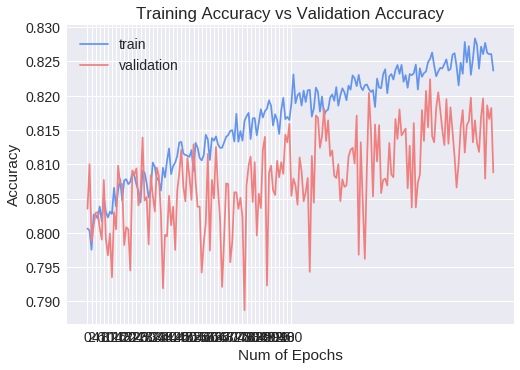

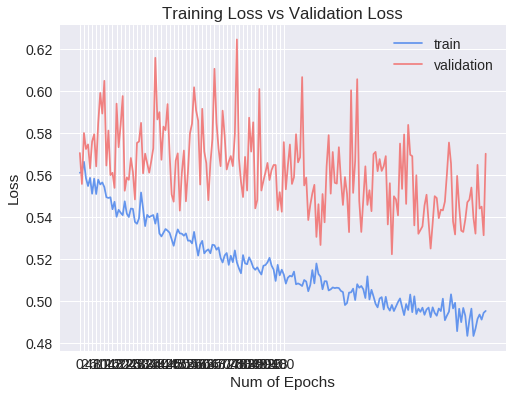

0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[794  10  41  14  24   5   7  10  82  13]
 [  9 916   1   5   3   3  10   1  23  29]
 [ 34   2 687  41  94  46  73  14   7   2]
 [  9   2  56 600  70 130 104  15  11   3]
 [  6   1  22  32 840  13  52  28   6   0]
 [  7   0  30 116  59 714  45  23   3   3]
 [  2   0  18  20  28  14 912   3   3   0]
 [  6   1  13  33  52  38  10 842   1   4]
 [ 19   7   6   5   7   2  10   4 936   4]
 [ 22  65   4  10   5   6   9  10  22 847]]


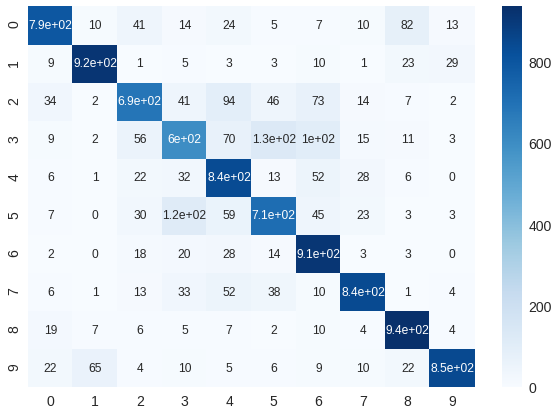

In [0]:
opt = SGD(lr=0.01, momentum=0.9, decay=0, nesterov=False)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

batch_size=128
epochs=200

import datetime

# from keras.callbacks import TensorBoard
# tbCallBack = TensorBoard(log_dir='./log', histogram_freq=1,
#                          write_graph=True,
#                          write_grads=True,
#                          batch_size=batch_size,
#                          write_images=True)




starttime = datetime.datetime.now()

model2 = model.fit(x_train, y_train, batch_size=batch_size, 
                   epochs=epochs, verbose=1, validation_data=(x_test, y_test))

endtime = datetime.datetime.now()
print (endtime - starttime)

scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


plt.figure(0)
plt.plot(model2.history['acc'],'cornflowerblue')
plt.plot(model2.history['val_acc'],'lightcoral')
plt.xticks(np.arange(0, 101, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
 
plt.figure(1)
plt.plot(model2.history['loss'],'cornflowerblue')
plt.plot(model2.history['val_loss'],'lightcoral')
plt.xticks(np.arange(0, 101, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
 
 
plt.show()


# Confusion matrix result
 
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
 
for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)
 
# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd
 
 
df_cm = pd.DataFrame(cm, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues",annot=True,annot_kws={"size": 12})# font size
plt.show()